# Limpieza del set de datos y análisis descriptivo

## Tabla de contenidos 

1. [Justificación de la limpieza del set de datos](#id1)

    1.1. [Librerías utilizadas](#id2)

2. [Fases de la limpieza previa al preprocesado](#id3)

    2.1. [Duplicados](#id4)
    
    2.2. [Limpieza del texto](#id5)

3. [Análisis exploratorio](#id6) 

    3.1. [Visualización de las palabras más frecuentes](#id7)
    
    3.2. [Rebalanceo de las etiquetas del set de datos](#id8)

4. [Exportación de los set de datos ](#id9)

<div id='id1' />


## 1. Justificación de la limpieza del set de datos

Cuando se trabaja con comentarios de texto como input para modelos de aprendizaje automático o de deep learning, es fundamental realizar un proceso de limpieza y preprocesamiento de los datos. Los comentarios en texto natural suelen contener una gran cantidad de ruido, incluyendo errores ortográficos, abreviaciones, emoticonos, caracteres especiales y diversas formas de expresión no estandarizadas. Este ruido puede afectar significativamente el rendimiento de los modelos, ya que estos están diseñados para trabajar con datos consistentes y estructurados. Sin un adecuado proceso de limpieza, los modelos pueden malinterpretar la información, llevando a predicciones inexactas y reduciendo la eficiencia del modelo.

Además, los comentarios en texto pueden contener información irrelevante o redundante que no contribuye al objetivo del modelo. Es esencial eliminar o transformar estos elementos para mejorar la calidad de los datos. Un preprocesamiento efectivo permite transformar el texto en una forma más manejable y estandarizada, lo que facilita la extracción de características relevantes y mejora la capacidad de generalización del modelo. Este enfoque asegura que los modelos puedan realizar predicciones más precisas y fiables, mejorando significativamente los resultados en tareas de procesamiento de lenguaje natural.

<div id='id2' />

## 1.1. Librerías utilizadas

In [2]:
# Tratamiento de datos

import numpy as np
import pandas as pd
import re
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')

# Gráficas

import seaborn as sns
import matplotlib as mpl 
import matplotlib.pyplot as plt

# Preprocesamiento

from sklearn.utils import resample

<div id='id3' />


# 2. Fases de la limpieza previa al preprocesado

In [2]:
# Necesario para ampliar el ancho de las columnas con el fin de ser capaces de leer más texto

pd.set_option("max_colwidth",1000)

In [3]:
comments_raw_df = pd.read_csv('../01_data/01_raw/comments_raw.csv', delimiter=',')

In [4]:
comments_raw_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0


In [5]:
comments_raw_df.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when your view completely contradicts the coverage in reliable sources, why should anyone care what you feel? You can't even give a consistent argument - is the opening only supposed to mention significant aspects, or the """"most significant"""" ones? \n\n""",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is a horrible thing you put on my talk page. 128.61.19.93,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for prostitution ring. - Crunch Captain.",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put on the speedy to have the first version deleted now that I look at it.,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand. I came here and my idea was bad right away. What kind of community goes """"you have bad ideas"""" go away, instead of helping rewrite them. """,0,0,0,0,0,0


In [6]:
# Ejemplo de un comentario

comments_raw_df.iloc[6]['comment_text']

'COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK'

In [7]:
comments_raw_df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [8]:
comments_df = comments_raw_df.copy()
comments_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when your view completely contradicts the coverage in reliable sources, why should anyone care what you feel? You can't even give a consistent argument - is the opening only supposed to mention significant aspects, or the """"most significant"""" ones? \n\n""",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is a horrible thing you put on my talk page. 128.61.19.93,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for prostitution ring. - Crunch Captain.",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put on the speedy to have the first version deleted now that I look at it.,0,0,0,0,0,0


In [9]:
# El contenido del dataframe

comments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


<div id='id4' />


## 2.1. Duplicados

In [10]:
# Eliminamos posibles registros duplicados

comments_df.drop_duplicates(subset= 'comment_text', inplace=True)

In [11]:
comments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


<div id='id5' />


## 2.1. Limpieza del texto

In [12]:
# Transformamos todo el texto a minúsculas

comments_df['comment_text'] = comments_df['comment_text'].str.lower()

In [13]:
# Eliminamos todos los caracteres que no sean alfanuméricos

comments_df['comment_text'] = comments_df['comment_text'].str.replace(r'[^\w\s]', '', regex=True)

In [14]:
# Comprobamos que las anteriores transformaciones se han realizado de forma correcta

print(comments_df.iloc[159566]['comment_text'])
print(comments_df.iloc[2]['comment_text'])

and for the second time of asking when your view completely contradicts the coverage in reliable sources why should anyone care what you feel you cant even give a consistent argument  is the opening only supposed to mention significant aspects or the most significant ones   


hey man im really not trying to edit war its just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page he seems to care more about the formatting than the actual info


In [15]:

# Función para eliminar HTML

def remove_html(text):
    return BeautifulSoup(text, "html.parser").get_text()

# Función para eliminar URLs

def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

# Aplicamos ambas funciones a la columna "comment_text"

comments_df['comment_text'] = comments_df['comment_text'].apply(remove_html).apply(remove_urls)



In [20]:
# Comprobación de que los enlaces se han elimnado con éxito

contains_http = comments_df['comment_text'].str.contains('http', case=False, na=False)
rows_with_http = comments_df[contains_http]
rows_with_http

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
2920,07e36fc910bd3eec,contents of the library objects and functions to be used outside situation\nlate august 2004\n\nclasses\npage a mediawiki page\n __init__ pagesite title the page with title title on wikimedia site site\n title the name of the page in a form suitable for an interwiki link\n urlname the name of the page in a form suitable for a url\n titlewithoutnamespace the name of the page with the namespace part removed\n section the section of the page the part of the name after \n sectionfreetitle the name without the section part\n aslink the name of the page in the form title or langtitle\n site the wiki this page is in\n encoding the encoding of the page\n isautotitle if the title is a well known autotranslatable title\n autoformat returns dictname value where value can be a year date etc\n and ...,0,0,0,0,0,0
12814,21f953c63e34d4a7,\n\nthat is fine with me afaict the tool silently ignores references it cannot parse so a simpler alternative would be to list those references along with the ones that resulted in http errors\n505348227,0,0,0,0,0,0
34069,5adf0bda473a94c2,misc\n\nhavent the ama guidelines been updated to include minium hdl levels of 40mgdl of serum blood i love joe harry frederick thompson\n\nsince it is likely that many people will come to this page because they have high cholesterol is it reasonable to include a checklist for lowering cholesterol eg\n\nthe american heart association suggests the following steps to reduce cholesterol levels\n watch your caloric intake by eating a wide variety of foods low in saturated fat and cholesterol\n eat at least five servings of fruits and vegetables every day\n eat six or more servings of cereals breads pasta and other whole grain products\n eat fish poultry without skin and leaner cuts of meat instead of fatty ones\n eat nonfat or 1 milk dairy products rather than wholemilk dairy products\n enjoy 3060 minutes of vigorous activities on most or all days of the week\n maintain a healthy weight\n\nthese 7 points are copied verbatim from a page linked from the american heart association page t...,0,0,0,0,0,0
35486,5ece6943a0d0e7d2,\n\n dmsg again \n\nthe reference to the dmsg deutsche multiple sklrose gesselschaft is problematic its a primary source is it independent from what organizations form as patient organizations often but as they develop they find sources of funding often from drug companies and can end up advocating the interests of drug companies instead of their original constituency this is not any kind of charge against dmsg directly maybe someone who can search german sources can tell us more but such a source does not necessarily stack up well against standard secondary sources and the medline article is pretty good and balanced the headline there is telling endovascular treatment of cerebrospinal venous insufficiency safe may provide benefit in ms obviously dr jung was correct such a claim is overstated if taken as proven the study was inadequate for that\n\nthere are two parts to this article the alleged syndrome and a proposed treatment which proceeds from the hypothesis regarding the syndr...,0,0,0,0,0,0
36720,62129ba179c41cba,this is a question best raised on the noscript support forums however i can comment on a few of the differences\n csp is serverside has to be configured at each server sends reports to the server while abe is clientside configured in browser logs results in error console\n csp just allows or blocks content whereas abe can take other actions like stripping authentication\n csp was primarily designed to stop crosssite scripting and other injections while abe was primarily designed to stop crosssite request forgery but can defeat xssinjections too\n csp allows wildcards abe allows either wildcards or regular expressions\n csp specifies only hostnames abe can specify full addresses including protocol and path\n abe knows about intranet vs internet addresses

In [47]:
print(comments_raw_df.iloc[40265]['comment_text'])


"
I can proove that the disney page was last changed on Sat. 2007-02-23 (by HTTP response headers)
Server: Microsoft-IIS/5.0
P3P: CP=""CAO DSP COR CURa ADMa DEVa TAIa PSAa PSDa IVAi IVDi CONi OUR SAMo OTRo BUS PHY ONL UNI PUR COM NAV INT DEM CNT STA PRE""
From: DOLHIGHWEB01
Cache-Expires: Sat, 12 Jan 2008 22:43:54 GMT
Cache-Control: max-age=300
Date: Sat, 12 Jan 2008 22:42:03 GMT
Last-Modified: Fri, 23 Feb 2007 20:23:41 GMT
Etag: ""8044e8818857c71:14a2""
Content-Type: text/html

200 OK
and was created (at least) at 2006-11-05 by reading the page source.

Maybe a site prior to this was released at 2006-01-18, but this would mean, that this site was also used while the movie was still showed in (european) cinemas.
var axel = Math.random()+"""";
var a = axel * 10000000000000;
//document.write('');
document.write('');
All codes here were taken from the Disney page I linked above.
I hope this brings true light into the dark.    "


In [48]:
print(comments_df.iloc[40265]['comment_text'])


i can proove that the disney page was last changed on sat 20070223 by http response headers
server microsoftiis50
p3p cpcao dsp cor cura adma deva taia psaa psda ivai ivdi coni our samo otro bus phy onl uni pur com nav int dem cnt sta pre
from dolhighweb01
cacheexpires sat 12 jan 2008 224354 gmt
cachecontrol maxage300
date sat 12 jan 2008 224203 gmt
lastmodified fri 23 feb 2007 202341 gmt
etag 8044e8818857c7114a2
contenttype texthtml

200 ok
and was created at least at 20061105 by reading the page source

maybe a site prior to this was released at 20060118 but this would mean that this site was also used while the movie was still showed in european cinemas
var axel  mathrandom
var a  axel  10000000000000
documentwrite
documentwrite
all codes here were taken from the disney page i linked above
i hope this brings true light into the dark    


In [25]:
prueba_http_2 = comments_df.iloc[139699]['comment_text']
print(prueba_http_2)

 you seem like a thoroughly pleasant chap http


<div id='id6' />


# 3. Análisis exploratorio

<div id='id7' />


## 3.1. Visualización de las palabras más frecuentes

Una forma útil y rápida de ver las palabras más frecuentes asociadas a cada una de las etiquetas que pretendemos preedecir es hacer uso de nubes de palabras o word clouds ya que son útiles porque ofrecen una representación rápida y efectiva de las palabras más frecuentes en un conjunto de datos de texto.

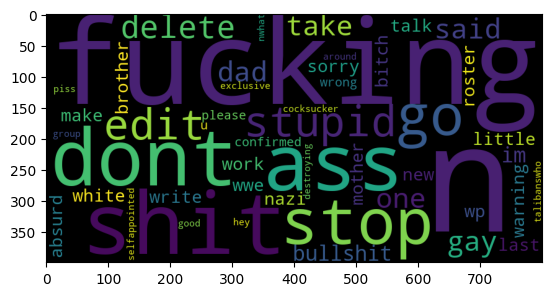

In [38]:
# Word cloud para los comentarios etiquetados como "toxic"

wordcloud = WordCloud(background_color='black',
                stopwords = STOPWORDS,
                max_words = 50,
                # max_font_size = max_font_size, 
                random_state = 42,
                width=800, 
                height=400)
wordcloud.generate(str(comments_df[comments_df['toxic']==1]['comment_text']))
plt.imshow(wordcloud);

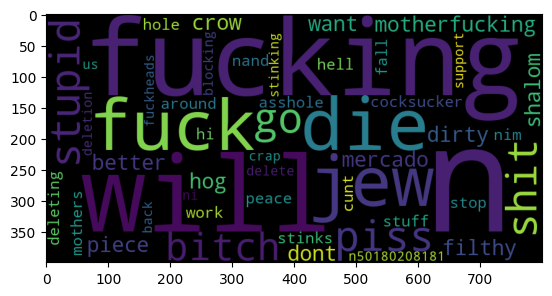

In [39]:
# Word cloud para los comentarios etiquetados como "severe_toxic"

wordcloud = WordCloud(background_color='black',
                stopwords = STOPWORDS,
                max_words = 50,
                # max_font_size = max_font_size, 
                random_state = 42,
                width=800, 
                height=400)
wordcloud.generate(str(comments_df[comments_df['severe_toxic']==1]['comment_text']))
plt.imshow(wordcloud);

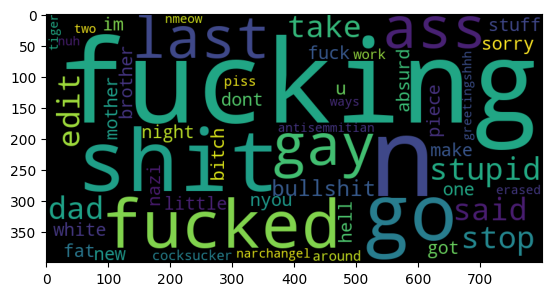

In [40]:
# Word cloud para los comentarios etiquetados como "obscene"

wordcloud = WordCloud(background_color='black',
                stopwords = STOPWORDS,
                max_words = 50,
                # max_font_size = max_font_size, 
                random_state = 42,
                width=800, 
                height=400)
wordcloud.generate(str(comments_df[comments_df['obscene']==1]['comment_text']))
plt.imshow(wordcloud);

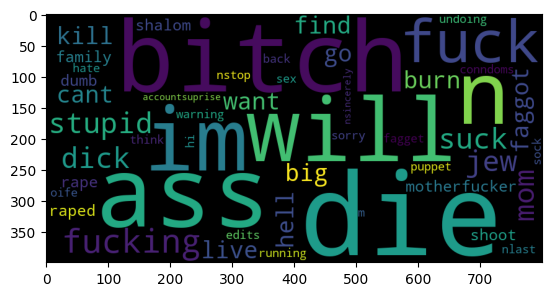

In [41]:
# Word cloud para los comentarios etiquetados como "threat"

wordcloud = WordCloud(background_color='black',
                stopwords = STOPWORDS,
                max_words = 50,
                # max_font_size = max_font_size, 
                random_state = 42,
                width=800, 
                height=400)
wordcloud.generate(str(comments_df[comments_df['threat']==1]['comment_text']))
plt.imshow(wordcloud);

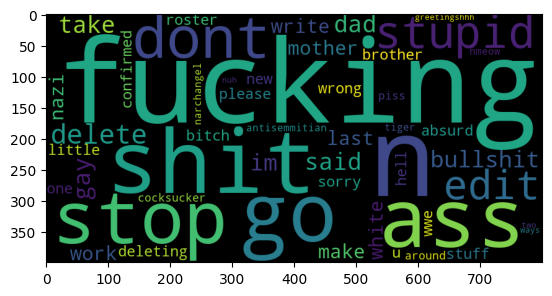

In [42]:
# Word cloud para los comentarios etiquetados como "insult"

wordcloud = WordCloud(background_color='black',
                stopwords = STOPWORDS,
                max_words = 50,
                # max_font_size = max_font_size, 
                random_state = 42,
                width=800, 
                height=400)
wordcloud.generate(str(comments_df[comments_df['insult']==1]['comment_text']))
plt.imshow(wordcloud);

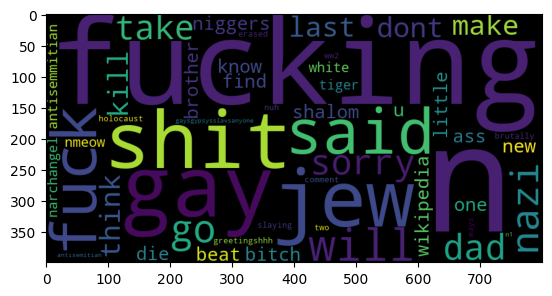

In [45]:
# Word cloud para los comentarios etiquetados como "identity_hate"

wordcloud = WordCloud(background_color='black',
                stopwords = STOPWORDS,
                max_words = 50,
                # max_font_size = max_font_size, 
                random_state = 42,
                width=800, 
                height=400)
wordcloud.generate(str(comments_df[comments_df['identity_hate']==1]['comment_text']))
plt.imshow(wordcloud);

<div id='id8' />

## 3.2. Rebalanceo de las etiquetas del set de datos

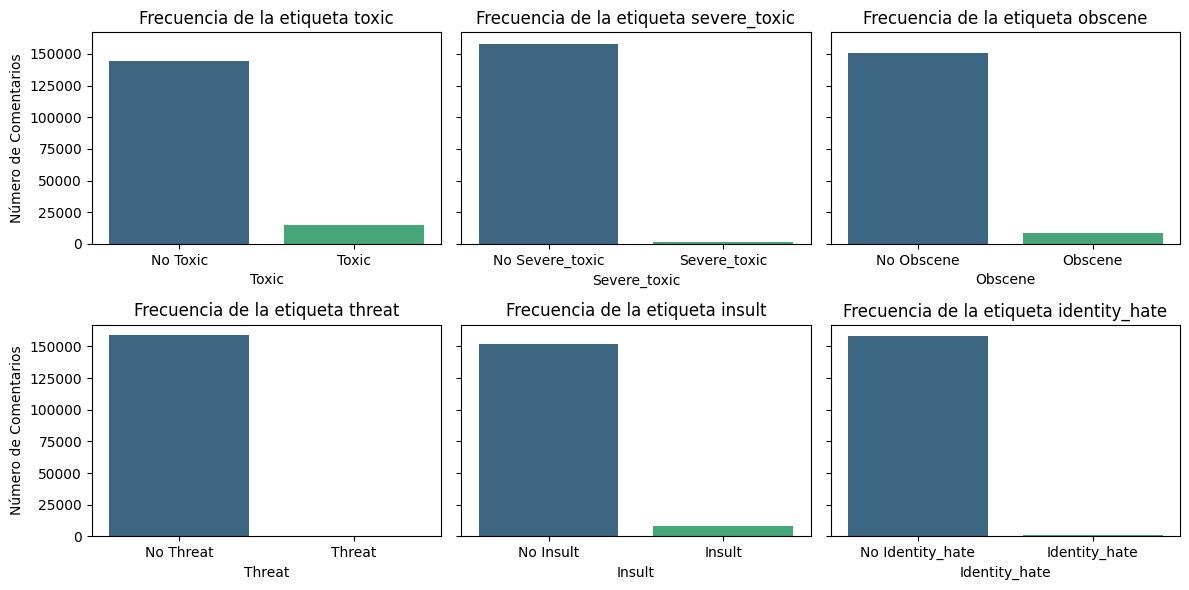

In [72]:
# Bucle que genere un gráfico de frecuencias para cada una de las etiquetas que estamos considerando

fig, axes = plt.subplots(2, 3, figsize=(12, 6), sharey=True)

variables = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

for i, var in enumerate(variables):
    row = i // 3
    col = i % 3
    sns.countplot(x=var, data=comments_df, hue=var, ax=axes[row, col], palette='viridis', legend=False)
    axes[row, col].set_title(f'Frecuencia de la etiqueta {var}')
    axes[row, col].set_xlabel(var.capitalize())  # Capitalizar el nombre de la variable para la etiqueta del eje x
    axes[row, col].set_ylabel('Número de Comentarios')

    axes[row, col].set_xticks([0, 1])
    axes[row, col].set_xticklabels(['No ' + var.capitalize(), var.capitalize()])

plt.tight_layout()

plt.show()

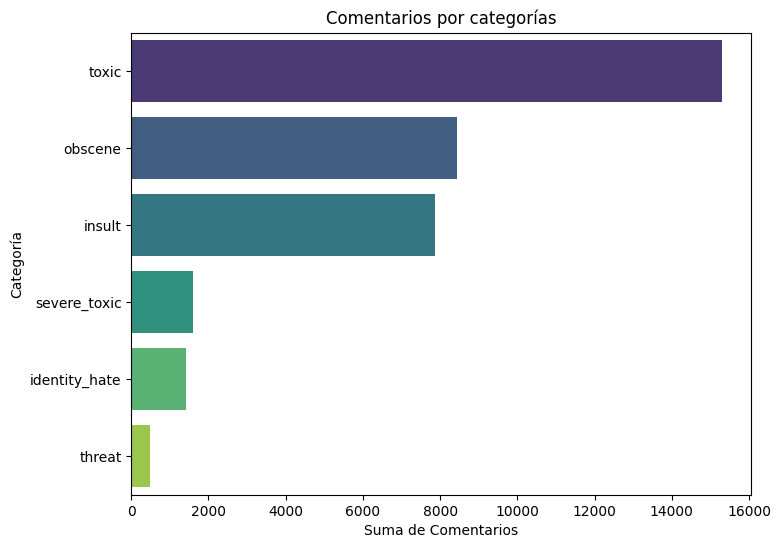

In [78]:
# Comparación de la frecuencia de las distintas etiquetas entre sí

toxic_sum = comments_df['toxic'].sum()
severe_toxic_sum = comments_df['severe_toxic'].sum()
obscene_sum = comments_df['obscene'].sum()
threat_sum = comments_df['threat'].sum()
insult_sum = comments_df['insult'].sum()
identity_hate_sum = comments_df['identity_hate'].sum()

# Crear un DataFrame para las sumas y ordenar de mayor a menor

sums_df = pd.DataFrame({
    'category': ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'],
    'count': [toxic_sum, severe_toxic_sum, obscene_sum, threat_sum, insult_sum, identity_hate_sum]
    })

sums_df = sums_df.sort_values(by='count', ascending=False)  # Ordenar de mayor a menor


plt.figure(figsize=(8, 6))

sns.barplot(x='count', y='category', data=sums_df, palette='viridis', hue='category', dodge=False, legend=False)

plt.title('Comentarios por categorías')
plt.xlabel('Suma de Comentarios')
plt.ylabel('Categoría')

plt.show()

Basado en los gráficos anteriores, es evidente que las etiquetas están notablemente desbalanceadas. Primero, al comparar con el total de comentarios, aquellos que no pertenecen a ninguna etiqueta específica (comentarios neutros) predominan significativamente sobre los que están etiquetados como tóxicos o problemáticos. Además, cuando se observa la distribución entre las etiquetas específicas como tóxico, severamente tóxico, obsceno, amenaza, insulto y odio hacia la identidad, se observa una disparidad clara, donde algunas categorías tienen una presencia mucho mayor que otras.

El manejo de desequilibrios de clases en problemas de clasificación es crucial para asegurar que el modelo de machine learning pueda aprender de manera efectiva y equitativa de todos los tipos de datos disponibles, y es por eso que se trata del siguiente paso en el proceso de limpieza del set de datos. 

De entre las distintas técnicas para el manejo de desequilibrios, nos vamos a decantar por hacer uso del unddersampling, una estrategia eficaz para contrarrestar el desbalance de clases en conjuntos de datos de clasificación. Al reducir la cantidad de muestras de las clases mayoritarias y equilibrarlas con las clases minoritarias, el undersampling no sólo optimiza el rendimiento del modelo al mitigar el sesgo hacia las clases dominantes, sino que también mejora la eficiencia computacional durante el entrenamiento al trabajar con conjuntos de datos más pequeños. Además, esta técnica ayuda a prevenir el sobreajuste al limitar la exposición del modelo a datos mayoritarios, lo que facilita una mejor generalización e interpretación de las métricas de evaluación del modelo.

In [80]:
# Definimos el dataframe para las clases minoritarias (no neutros)

comments_df_minority = comments_df[(comments_df['toxic'] == 1) | (comments_df['severe_toxic'] == 1) | 
                          (comments_df['obscene'] == 1) | (comments_df['threat'] == 1) | 
                          (comments_df['insult'] == 1) | (comments_df['identity_hate'] == 1)]

# Definimos el dataframe para la clase mayoritaria (neutros)

comments_df_majority = comments_df[(comments_df['toxic'] == 0) & (comments_df['severe_toxic'] == 0) & 
                          (comments_df['obscene'] == 0) & (comments_df['threat'] == 0) & 
                          (comments_df['insult'] == 0) & (comments_df['identity_hate'] == 0)]

# Aplicamos el undersampling

comments_df_majority_downsampled = resample(comments_df_majority, 
                                   replace=False,    
                                   n_samples=len(comments_df_minority), 
                                   random_state=16)

comments_df_undersampled = pd.concat([comments_df_majority_downsampled, comments_df_minority])

# Verificar la cantidad de registros en el nuevo DataFrame undersampled

print(f"Total de registros después de undersampling: {len(comments_df_undersampled)}")

Total de registros después de undersampling: 32450


<div id='id9' />

# 4. Exportación de los set de datos 

In [81]:
# Exportamos los dataframes para completar el trabajo de limpieza

comments_df.to_csv('comments_df.csv', index=False)

comments_df_undersampled.to_csv('comments_df_undersampled.csv', index=False)